In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)
library("zellkonverter")
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
library(dplyr)
library(Signac)
library(loomR)
library(scater)
library(edgeR)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Warning message:
"package 'MatrixGenerics' was built under R version 4.3.1"
Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.3.1"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowC

In [2]:
mm_sce  <- readH5AD("MM_final_subset_MMHealth.h5ad", verbose = TRUE, reader = "python")

ℹ Using the Python reader

ℹ Using anndata version 0.8.0

⠙ Reading './MM_final_subset_MMHealth.h5ad '
✔ Read ./MM_final_subset_MMHealth.h5ad [3.9s]


ℹ Converting AnnData to SingleCellExperiment
ℹ Converting uns to metadata                
ℹ Converting uns            
ℹ Converting uns$_scvi_manager_uuid
✔ uns$_scvi_manager_uuid converted s]


ℹ Converting uns
ℹ Converting uns$_scvi_uuid
✔ uns$_scvi_uuid converted s]


ℹ Converting uns
ℹ Converting uns$celltypist_cell_label_coarse_colors
✔ uns$celltypist_cell_label_coarse_colors converted s]


ℹ Converting uns
ℹ Converting uns$celltypist_cell_label_fine_colors
✔ uns$celltypist_cell_label_fine_colors converted s]


ℹ Converting uns
ℹ Converting uns$hvg
ℹ Converting uns$hvg$flavor
✔ uns$hvg$flavor converted s]


ℹ Converting uns$hvg
✔ uns$hvg converted s]


ℹ Converting uns
ℹ Converting uns$leiden
ℹ Converting uns$leiden$params
ℹ Converting uns$leiden$params$n_iterations
✔ uns$leiden$params$n_iterations converted s]


ℹ Converting uns$le

ℹ Converting uns
Warning message:
"The names of these selected uns items have been modified to match R
conventions: '_scvi_manager_uuid' -> 'X_scvi_manager_uuid' and '_scvi_uuid' ->
'X_scvi_uuid'"
✔ uns converted [3.6s]


ℹ Converting uns to metadata
✔ Converting uns to metadata ... done


ℹ Converting AnnData to SingleCellExperiment
ℹ Converting X matrix to assay              
✔ X matrix converted to assay [3.2s]


ℹ Converting AnnData to SingleCellExperiment
ℹ Converting layers to assays               
ℹ Converting layers$counts   
✔ layers$counts converted s]


ℹ Converting layers to assays
ℹ Converting layers$scvi_normalized
✔ layers$scvi_normalized converted [1.5s]


ℹ Converting layers to assays
✔ Converting layers to assays ... done


ℹ Converting AnnData to SingleCellExperiment
ℹ Converting var to rowData                 
✔ var converted to rowData s]


ℹ Converting AnnData to SingleCellExperiment
ℹ Converting obs to colData                 
                           
! The na

In [3]:
#saveRDS(mm_sce, "MMHealth_data_oly.rds")

In [2]:
#mm_sce  <- readH5AD("adata_raw.h5ad", verbose = TRUE, reader = "python")

In [3]:
#mm_sce <- readRDS(file = "MM_data_SCE.rds")




mm_sce

class: SingleCellExperiment 
dim: 2974 4978 
metadata(18): X_scvi_manager_uuid X_scvi_uuid ... study_id_colors umap
assays(3): X counts scvi_normalized
rownames(2974): FUCA2 LAS1L ... PRRC2B SOD2
rowData names(16): features mt ... std varm
colnames(4978): ACATACGTCATTGCGA-1_17_1 ATTATCCAGCCTTGAT-1_17_1 ...
  TTTACTGAGGACCCAA-1_27_8 TTTGATCAGAGGGCGA-1_27_8
colData names(37): orig.ident nCount_RNA ... celltypist_cell_label_fine
  celltypist_conf_score_fine
reducedDimNames(3): X_pca X_scVI X_umap
mainExpName: NULL
altExpNames(0):

In [4]:
#logcounts(mm_sce) <- assay(mm_sce, "scvi_normalized")


In [4]:
mm_sce

class: SingleCellExperiment 
dim: 2974 4978 
metadata(18): X_scvi_manager_uuid X_scvi_uuid ... study_id_colors umap
assays(3): X counts scvi_normalized
rownames(2974): FUCA2 LAS1L ... PRRC2B SOD2
rowData names(16): features mt ... std varm
colnames(4978): ACATACGTCATTGCGA-1_17_1 ATTATCCAGCCTTGAT-1_17_1 ...
  TTTACTGAGGACCCAA-1_27_8 TTTGATCAGAGGGCGA-1_27_8
colData names(37): orig.ident nCount_RNA ... celltypist_cell_label_fine
  celltypist_conf_score_fine
reducedDimNames(3): X_pca X_scVI X_umap
mainExpName: NULL
altExpNames(0):

In [6]:
#assay(mm_sce, "scvi_normalized")

In [5]:
mm_milo <- Milo(mm_sce)


mm_milo

class: Milo 
dim: 2974 4978 
metadata(18): X_scvi_manager_uuid X_scvi_uuid ... study_id_colors umap
assays(3): X counts scvi_normalized
rownames(2974): FUCA2 LAS1L ... PRRC2B SOD2
rowData names(16): features mt ... std varm
colnames(4978): ACATACGTCATTGCGA-1_17_1 ATTATCCAGCCTTGAT-1_17_1 ...
  TTTACTGAGGACCCAA-1_27_8 TTTGATCAGAGGGCGA-1_27_8
colData names(37): orig.ident nCount_RNA ... celltypist_cell_label_fine
  celltypist_conf_score_fine
reducedDimNames(3): X_pca X_scVI X_umap
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

In [6]:
reducedDim(mm_milo, "UMAP") <- reducedDim(mm_sce, "X_umap")

In [7]:
reducedDim(mm_milo, "PCA") <- reducedDim(mm_sce, "X_pca")

In [8]:
mm_milo <- buildGraph(mm_milo, k = 30, d =30, reduced.dim="PCA")


Warning message in (function (to_check, X, clust_centers, clust_info, dtype, nn, :
"detected tied distances to neighbors, see ?'BiocNeighbors-ties'"
Constructing kNN graph with k:30



In [9]:
mm_milo <- makeNhoods(mm_milo, k = 30, d=30, refined = TRUE, reduced_dim="PCA")


Checking valid object

Running refined sampling with reduced_dim



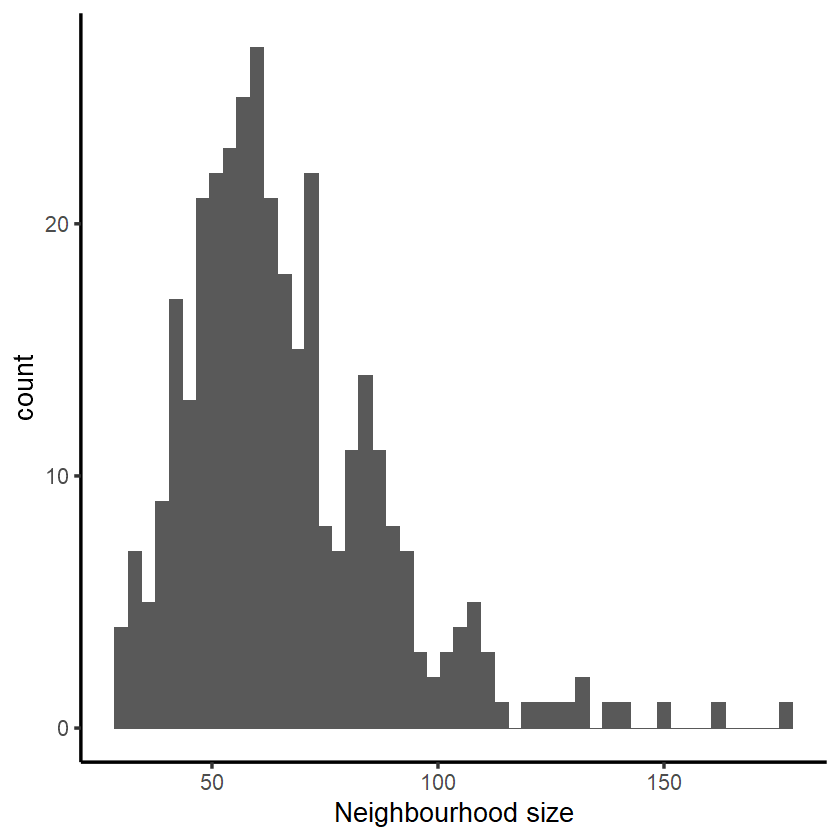

In [10]:
plotNhoodSizeHist(mm_milo)


In [11]:
mm_milo <- countCells(mm_milo, meta.data = data.frame(colData(mm_milo)), samples="sample_id")


Checking meta.data validity

Counting cells in neighbourhoods



In [12]:
nhoodCounts(mm_milo)

  [[ suppressing 179 column names 'GSM3272359', 'GSM3272364', 'GSM3272366' ... ]]



347 x 179 sparse Matrix of class "dgCMatrix"
                                                                               
1   . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . .
2   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
3   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
4   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
5   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
6   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
7   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
8   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
9   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
10  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
11  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [13]:
mm_design = data.frame(colData(mm_milo))[, c("sample_id", "stage")]
## Convert batch info from integer to factor
mm_design$sample_id <- as.factor(mm_design$sample_id) 
mm_design$stage <- as.factor(mm_design$stage) 

mm_design <- distinct(mm_design)
rownames(mm_design) <- mm_design$sample_id

#mm_design <- mm_design[colnames(nhoodCounts(mm_milo)), , drop=FALSE]


mm_design

,sample_id,stage
,<fct>,<fct>
GSM3528764,GSM3528764,MM
GSM3528767,GSM3528767,MM
GSM3528769,GSM3528769,MM
GSM3528771,GSM3528771,MM
GSM3528773,GSM3528773,MM
GSM3528775,GSM3528775,MM
GSM3528777,GSM3528777,MM
GSM3528779,GSM3528779,Healthy
GSM3528781,GSM3528781,Healthy


In [14]:
mm_milo <- calcNhoodDistance(mm_milo, d=30, reduced.dim = "PCA")


'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [15]:
da_results <- testNhoods(mm_milo, design = ~ stage, design.df = mm_design, reduced.dim = "PCA")
head(da_results)

Warning message in testNhoods(mm_milo, design = ~stage, design.df = mm_design, reduced.dim = "PCA"):
"Sample names in design matrix and nhood counts are not matched. Reordering"
Using TMM normalisation

Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.941198,14.77120,16.58526,5.447266e-05,1.331128e-04,1,1.280396e-04
2,-1.497352,14.61425,14.07652,4.793848e-03,8.075074e-03,2,7.845840e-03
3,1.281658,14.51317,13.63884,2.473527e-04,5.364461e-04,3,5.214908e-04
4,2.632881,14.67920,37.28317,2.294529e-09,3.619099e-08,4,3.427771e-08
5,1.950343,14.54764,34.48336,8.638440e-09,6.812588e-08,5,5.960433e-08
6,1.415254,14.47619,30.72496,9.302771e-08,3.651206e-07,6,3.378198e-07


In [16]:
da_results %>%
  arrange(- SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,-1.15045786,16.39348,1.709338e+00,0.9925304,0.9964050,57,0.9964050
123,0.03683854,14.75591,5.912686e-05,0.9938680,0.9964050,123,0.9964050
211,0.03443821,14.70140,2.032249e-05,0.9964050,0.9964050,211,0.9964050
69,-0.12994451,15.00761,1.880148e-03,0.9654322,0.9765048,69,0.9755463
73,-0.50532435,14.63124,1.287538e+00,0.9680624,0.9765048,73,0.9755463
194,-1.16280004,14.61340,7.539746e+00,0.9680623,0.9765048,194,0.9755463


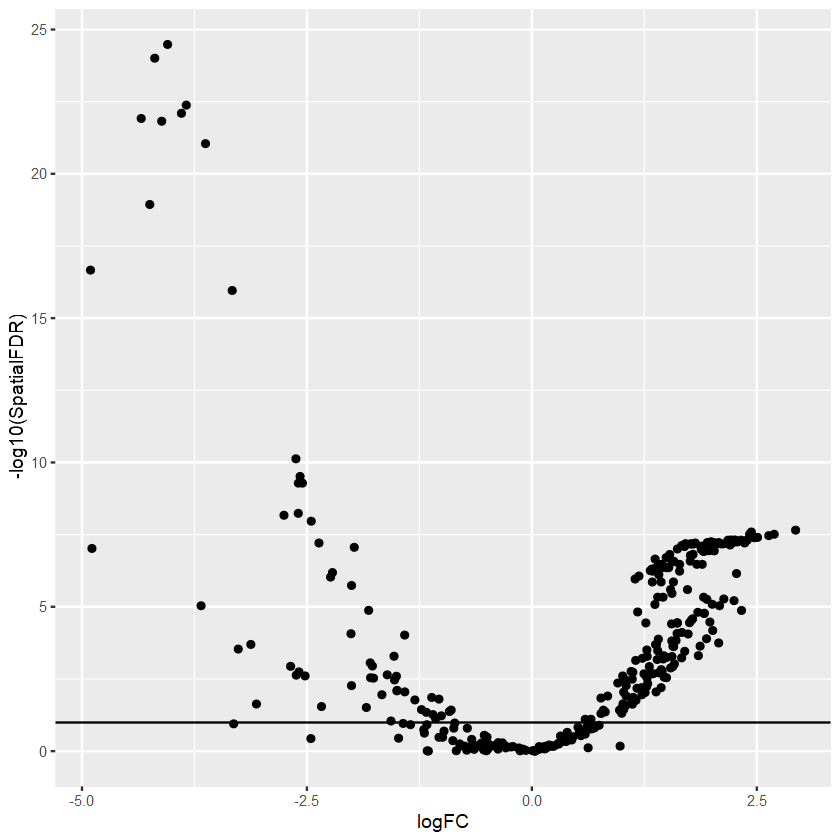

In [17]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [19]:
mm_milo

class: Milo 
dim: 2974 4978 
metadata(18): X_scvi_manager_uuid X_scvi_uuid ... study_id_colors umap
assays(3): X counts scvi_normalized
rownames(2974): FUCA2 LAS1L ... PRRC2B SOD2
rowData names(16): features mt ... std varm
colnames(4978): ACATACGTCATTGCGA-1_17_1 ATTATCCAGCCTTGAT-1_17_1 ...
  TTTACTGAGGACCCAA-1_27_8 TTTGATCAGAGGGCGA-1_27_8
colData names(37): orig.ident nCount_RNA ... celltypist_cell_label_fine
  celltypist_conf_score_fine
reducedDimNames(5): X_pca X_scVI X_umap UMAP PCA
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 4978 347
nhoodCounts dimensions(2): 347 179
nhoodDistances dimension(1): 347
graph names(1): graph
nhoodIndex names(1): 347
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 347 347

In [18]:
mm_milo <- buildNhoodGraph(mm_milo)

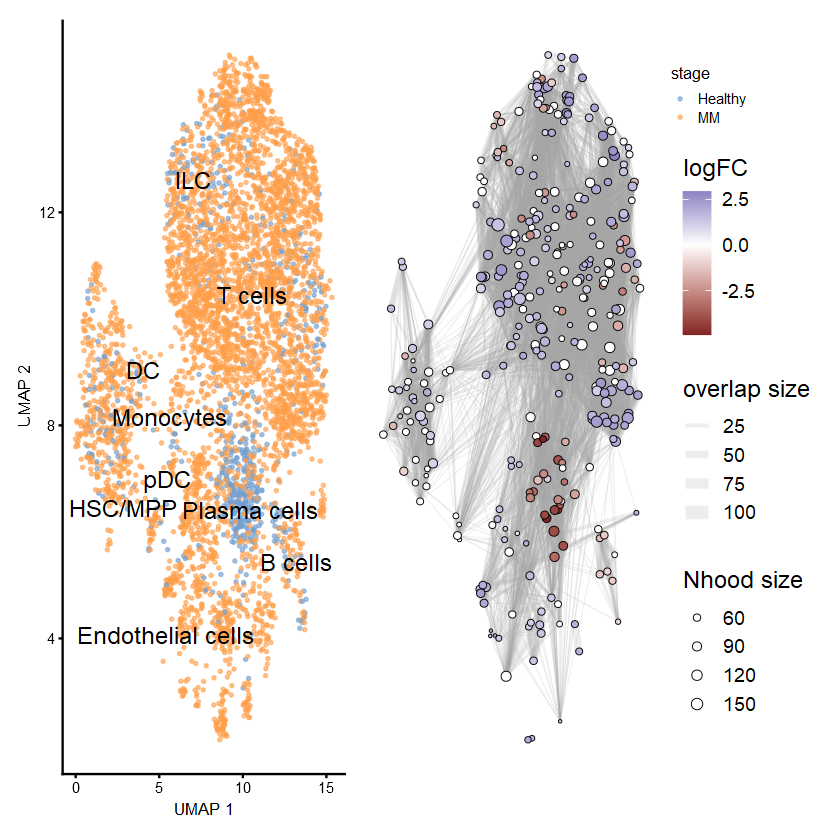

In [23]:
umap_pl <- plotReducedDim(mm_milo, dimred = "UMAP", colour_by="stage", text_by = "celltypist_cell_label_coarse", 
                          text_size = 5, point_size=0.5) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(mm_milo, da_results, alpha=0.1) 
  
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [24]:
da_results <- annotateNhoods(mm_milo, da_results, coldata_col = "celltypist_cell_label_coarse")
head(da_results)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,celltypist_cell_label_coarse,celltypist_cell_label_coarse_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1.941198,14.77120,16.58526,5.447266e-05,1.331128e-04,1,1.280396e-04,T cells,0.9405941
2,-1.497352,14.61425,14.07652,4.793848e-03,8.075074e-03,2,7.845840e-03,Monocytes,0.9795918
3,1.281658,14.51317,13.63884,2.473527e-04,5.364461e-04,3,5.214908e-04,Monocytes,1.0000000
4,2.632881,14.67920,37.28317,2.294529e-09,3.619099e-08,4,3.427771e-08,T cells,1.0000000
5,1.950343,14.54764,34.48336,8.638440e-09,6.812588e-08,5,5.960433e-08,ILC,0.7014925
6,1.415254,14.47619,30.72496,9.302771e-08,3.651206e-07,6,3.378198e-07,T cells,0.9148936


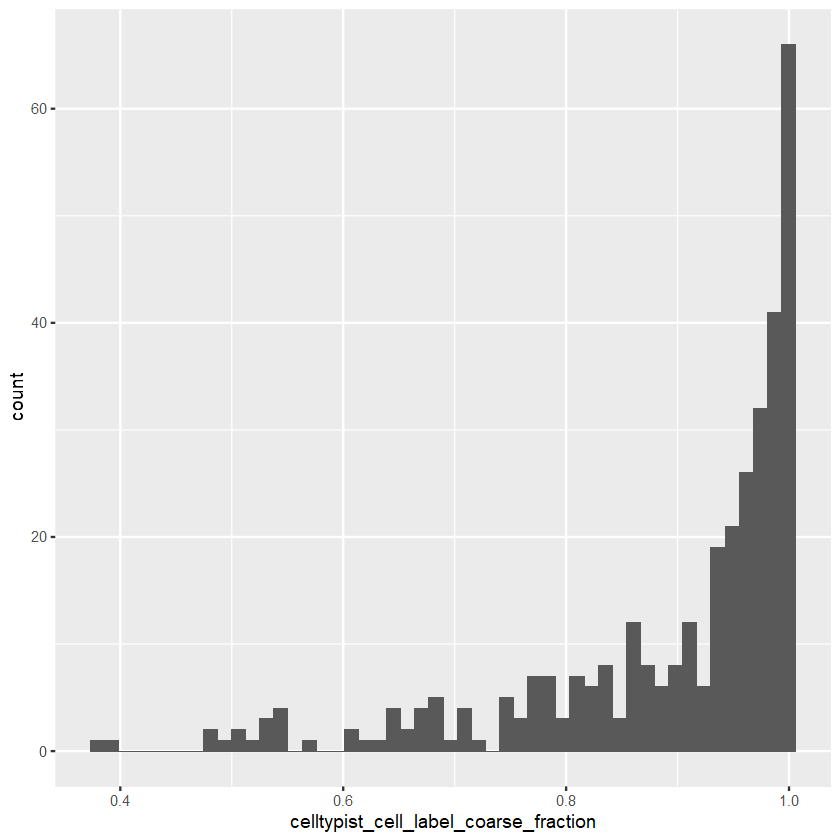

In [28]:
ggplot(da_results, aes(celltypist_cell_label_coarse_fraction)) + geom_histogram(bins=50)


In [31]:
da_results$celltypist_cell_label_coarse <- ifelse(da_results$celltypist_cell_label_coarse_fraction < 0.5, "Mixed", da_results$celltypist_cell_label_coarse)


Converting group_by to factor...



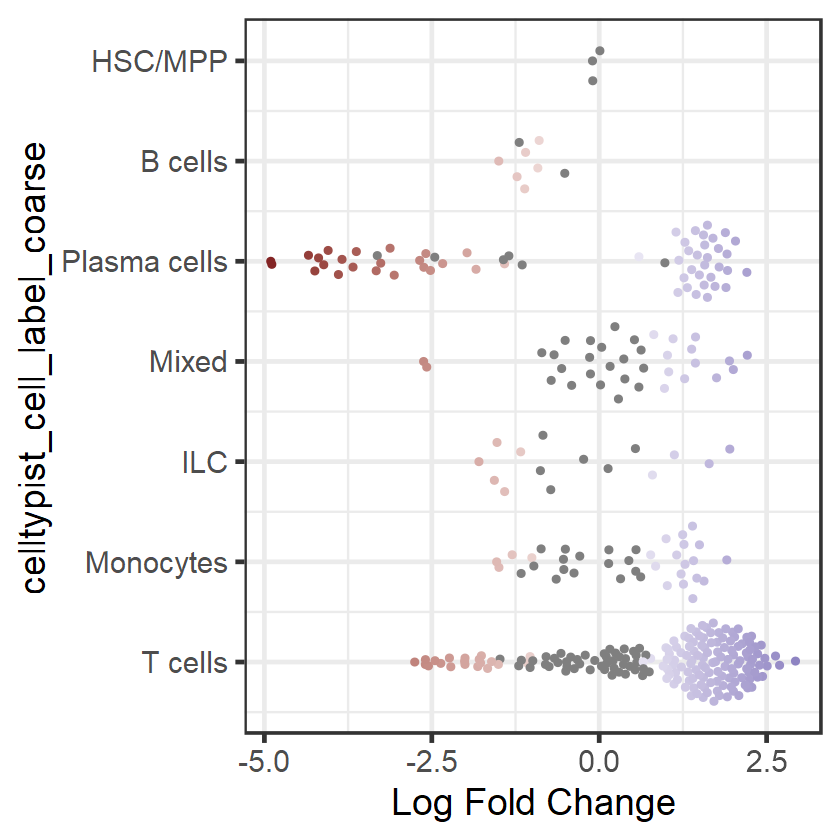

In [32]:
plotDAbeeswarm(da_results, group.by = "celltypist_cell_label_coarse")


In [ ]:
#counts(mm_sce)
mm_milo <- logNormCounts(mm_milo, assay="count")
da_results$NhoodGroup <- as.numeric(da_results$SpatialFDR < 0.1 & da_results$logFC < 0)
da_nhood_markers <- findNhoodGroupMarkers(mm_milo, da_results, subset.row = rownames(mm_milo)[1:100])

In [ ]:
head(da_nhood_markers)

In [ ]:
da_nhood_markers <- findNhoodGroupMarkers(mm_milo, da_results, subset.row = rownames(mm_milo)[1:10], 
                                          aggregate.samples = TRUE, sample_col = "sample_id")

In [ ]:
head(da_nhood_markers)

In [ ]:
mm_milo <- buildNhoodGraph(mm_milo)

## Find groups
da_results <- groupNhoods(mm_milo, da_results, max.lfc.delta = 10)
head(da_results)

In [ ]:
plotNhoodGroups(mm_milo, da_results, layout="UMAP") 

In [ ]:
plotDAbeeswarm(da_results, "NhoodGroup")

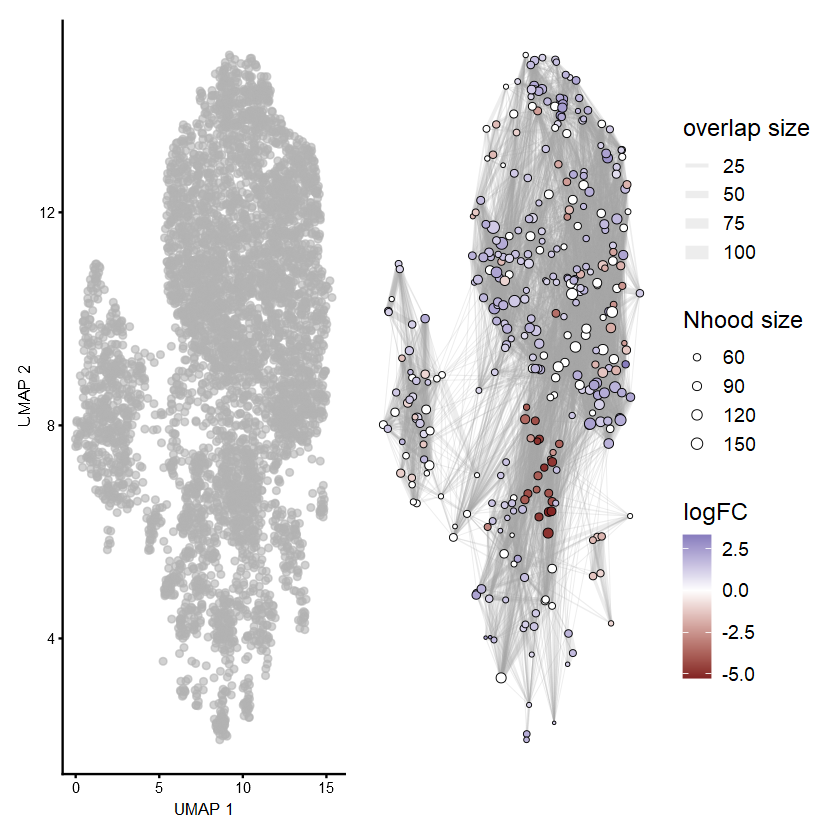

In [21]:
plotUMAP(mm_milo) + plotNhoodGraphDA(mm_milo, da_results, alpha=0.05) +
  plot_layout(guides="collect")

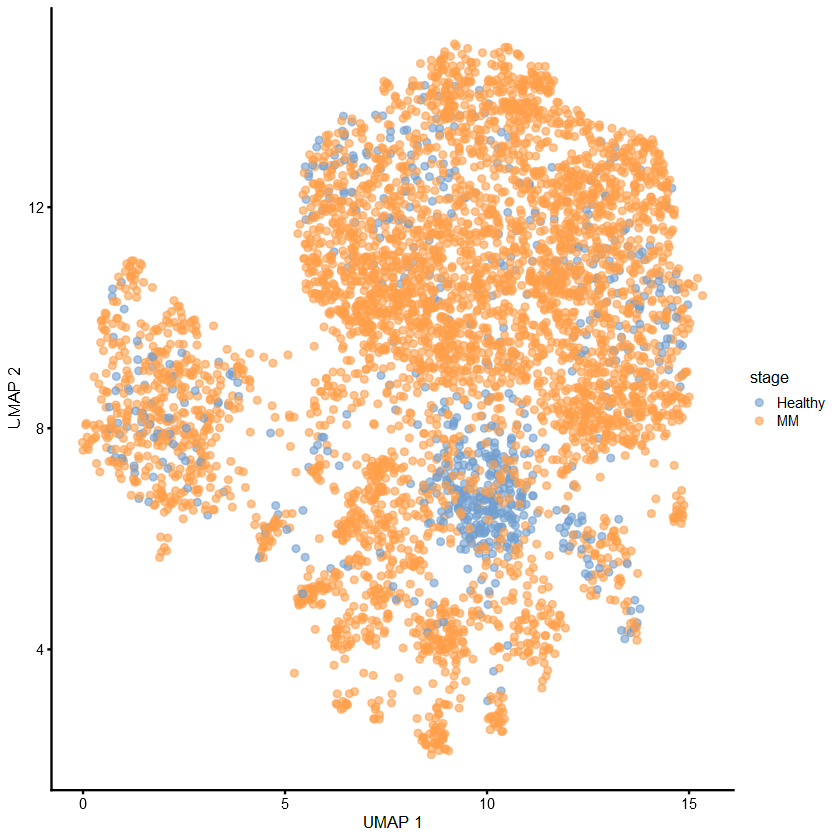

In [26]:
plotUMAP(mm_milo, colour_by="stage")
